In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
#Giris verilerini manuel olarak tanimliyoruz
data = {'Elemanlararasimesafe': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
        'L': [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11],
        'W': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
        'h': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01],
        'Dielektriksabiti': [2]*10,
        'GHz': [5.303301, 3.535534, 2.65165, 2.12132, 1.767767, 1.515228, 1.325825, 1.178511, 1.0606601, 0.964236]
        }

# Veri cercevesini olusturma
df = pd.DataFrame(data)

# Grisi (X) ve Cikis (y) verilerini ayirma
X = df[['Elemanlararasimesafe', 'L', 'W', 'h']].values # Girisler
y = df['GHz'].values # Cikis (GHz)

In [ ]:
# Modeli olusturma
model = Sequential()

# Ilk katman: 4 giris, 64 noron, ReLU aktivasyon fonksiyonu
model.add(Dense(64, input_dim=4, activation='relu'))

# Ikinci katman: 32 noron, ReLU aktivasyon fonksiyonu
model.add(Dense(32, activation='relu'))

# Cikti katmani: 1 noron (GHz tahmini)
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Modeli derleme
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
# Modeli egitme
model.fit(X, y, epochs=500, batch_size=5, verbose=1)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.5775
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.7250
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.6237 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.5573
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.4549
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.5335 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.7681
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.0344 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.3224
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.2797
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.2070 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.2018 
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.2174
Epoch 14/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.8555  
Epoch 15/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.1496 
Epoch 16/500
2/2 ━

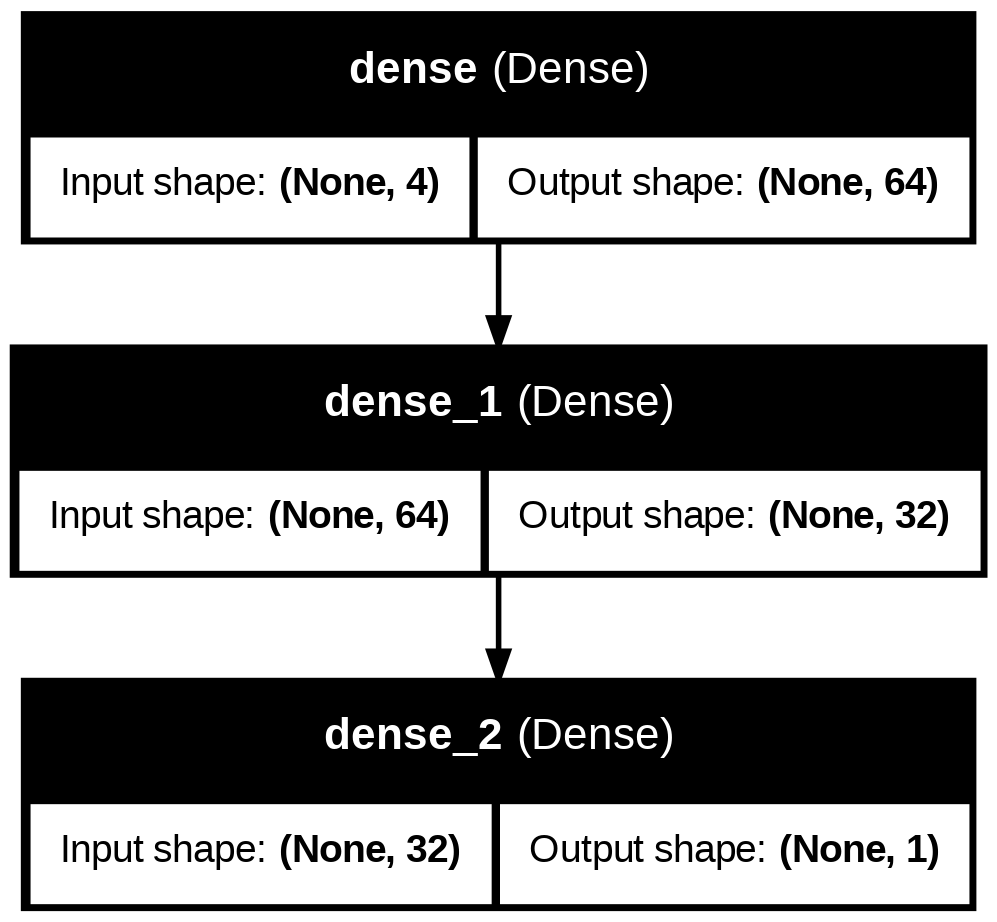

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_mimari.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Model ile tahmin yapma (eğitim sonrası)
predictions = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


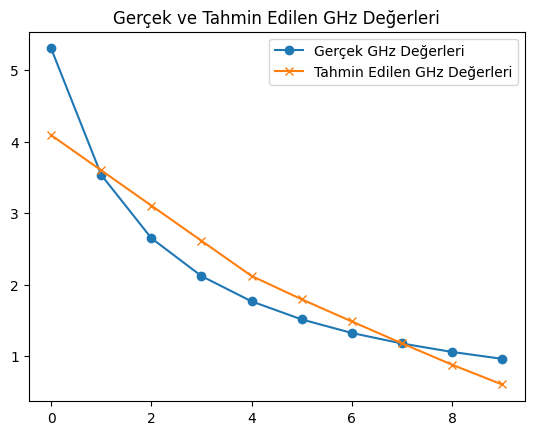

In [ ]:
# Tahminleri ve gerçek değerleri karşılaştırma
plt.plot(y, label="Gerçek GHz Değerleri", marker='o')
plt.plot(predictions, label="Tahmin Edilen GHz Değerleri", marker='x')
plt.title("Gerçek ve Tahmin Edilen GHz Değerleri")
plt.legend()
plt.show()

In [ ]:
# Yeni verilerle tahmin yapma (örnek veriler)
new_data = np.array([[0.02, 0.03, 0.02, 0.002],  # Yeni veri örneği 1
                     [0.05, 0.06, 0.05, 0.005]])  # Yeni veri örneği 2

new_predictions = model.predict(new_data)

print("Yeni Veri Tahminleri (GHz):", new_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Yeni Veri Tahminleri (GHz): [[3.5993533]
 [2.1229143]]
